In [3]:
#  -*-  coding: utf-8  -*- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False ##确保负号正常显示

In [4]:
data = pd.read_csv('./data/4.1/data1.csv')

In [5]:
data

,goodsName,shopName,shopAge,shopPlace,shopMiaoshu,shopWuliu,shopFuwu,age,price,monthly_sales,...,红色,荷叶边,蓝色,淑女,桑蚕丝,一步裙,绣花,粉色,长袖,碎花
0,歌兔雪纺连衣裙夏季长裙修身显瘦小清新 中长款女装露肩高腰裙子,歌兔服饰旗舰店,3,杭州,4.8,4.7,4.7,25-29,69.0,2952,...,1,1,1,0,0,0,0,1,0,1
1,卡洛莱韩版气质修身露肩收腰a字裙夏季新款女装时尚雪纺连衣裙女,卡洛莱旗舰店,4,杭州,4.8,4.7,4.7,25-29,99.0,2944,...,1,0,1,0,0,0,0,1,0,0
2,Krazy清新减龄显瘦32支纯棉撞色polo领海魂条纹学院风弹力连衣裙,krazy服饰旗舰店,6,广州,4.8,4.8,4.8,25-29,131.0,2943,...,0,0,0,0,0,0,0,0,0,0
3,连衣裙女夏2016新款潮大码露肩小清新吊带裙印花V领雪纺沙滩裙子,多曼妮旗舰店,0,广州,4.8,4.7,4.7,18-24,69.0,2925,...,0,1,0,0,0,0,0,0,0,0
4,韩版显瘦鱼尾裙子2016夏季高腰包臀挂脖露肩荷叶边无袖连衣裙修身,米莱伊旗舰店,3,杭州,4.8,4.8,4.8,25-29,158.0,2924,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,betu百图中长款V领条纹无袖连衣裙女修身显瘦背带裙2016秋1607T36,betu旗舰店,7,深圳,4.8,4.8,4.8,25-29,288.0,99,...,0,0,0,0,0,1,0,0,0,0
5189,念曼2016夏装新款韩国百搭文艺范气质收腰显瘦中长款棉麻连衣裙女,念曼旗舰店,0,杭州,4.8,4.8,4.8,25-29,158.0,99,...,0,0,1,0,0,0,0,1,0,0
5190,2016夏季小清新V领修身收腰纯色中长款白色网格镂空a字大摆连衣裙,灵子飞飞旗舰店,3,深圳,4.8,4.8,4.8,25-29,289.0,99,...,0,1,0,0,0,0,1,0,0,0
5191,欧美高端大牌2016直筒印花修身妇女品牌中年女装夏装大码连衣裙夏,eychii旗舰店,3,深圳,4.9,4.9,4.9,30-34,288.0,99,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#月销量分段统计

<AxesSubplot:>

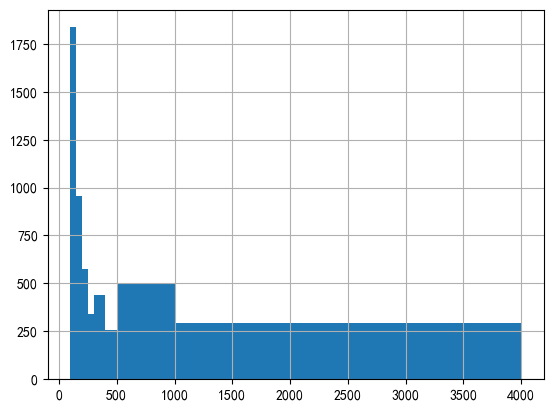

In [7]:
data['monthly_sales'].hist(bins = [98,150,200,250,300,400,500,1000,4000])

<AxesSubplot:>

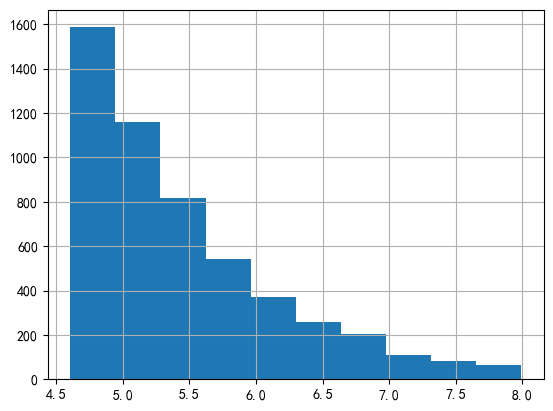

In [8]:
data['monthly_sales_log'] = data['monthly_sales'].apply(np.log1p)
data['monthly_sales_log'].hist()

In [9]:
data['shopAge'].max()

9

In [10]:
#自定义箱线图函数
def lei_boxplot(df, column,boxwidth,title,xlabel,ylabel):
    import math
    #将绘图所需数据列转变为列表元组
    tmp = df.reset_index()
    tmp = pd.pivot(tmp, index = 'index', columns = column)
    tmp_X = ()
    tmp_width = []
    for i in range(tmp.shape[1]):  #返回列数
        s = list(tmp.iloc[:,i].dropna())  #返回第i列所有非空值的值，形成列表
        tmp_X = tmp_X+(s,)  #列表变为元组
        tmp_width.append(len(s))  #得到列表s的长度
    #根据每列元素个数设置箱体宽度
    m = max(tmp_width)
    for i in range(len(tmp_width)):
        tmp_width[i] = math.sqrt(boxwidth*tmp_width[i]/m)
     
    #获取绘图所需标签列
    label = []
    for i in range(len(tmp.columns)):
        label.append(tmp.columns[i][1])
    #绘图
    plt.boxplot(tmp_X,labels = label, widths = tmp_width)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [11]:
#店铺年龄对销量的影响

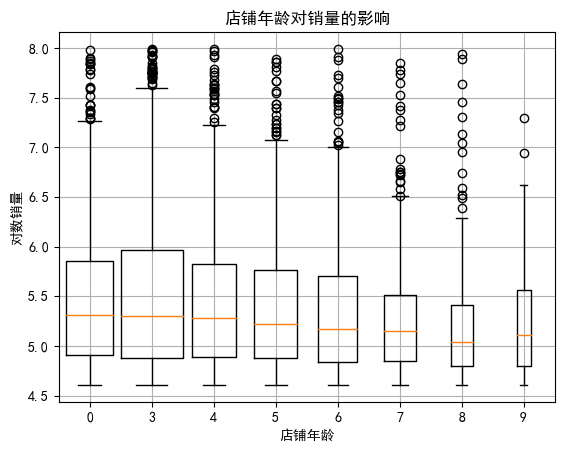

In [12]:
lei_boxplot(data[['monthly_sales_log','shopAge']], 'shopAge',1,'店铺年龄对销量的影响','店铺年龄','对数销量')

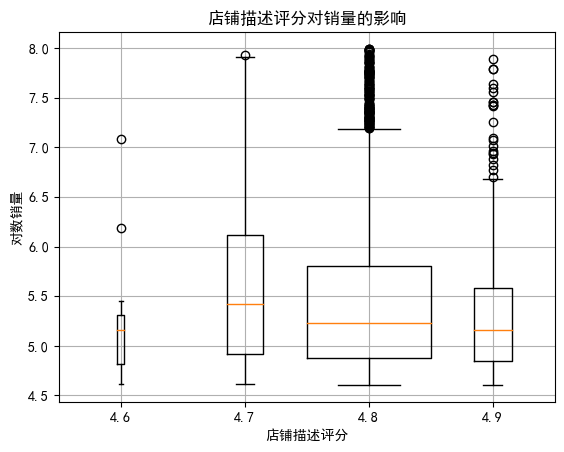

In [13]:
lei_boxplot(data[['monthly_sales_log','shopMiaoshu']], 'shopMiaoshu',1,'店铺描述评分对销量的影响','店铺描述评分','对数销量')

In [14]:
data[['monthly_sales','shopMiaoshu']].groupby(by='shopMiaoshu').count()

,monthly_sales
shopMiaoshu,
4.6,16
4.7,368
4.8,4398
4.9,411


In [15]:
#店铺地点的描述性统计：
data[['monthly_sales','shopPlace']].groupby('shopPlace').sum().sort_values('monthly_sales',ascending=False).head(10)

,monthly_sales
shopPlace,
杭州,495860
广州,347713
深圳,157202
上海,134852
东莞,101352
嘉兴,58319
佛山,41845
北京,41736
武汉,37884


<AxesSubplot:xlabel='price', ylabel='monthly_sales'>

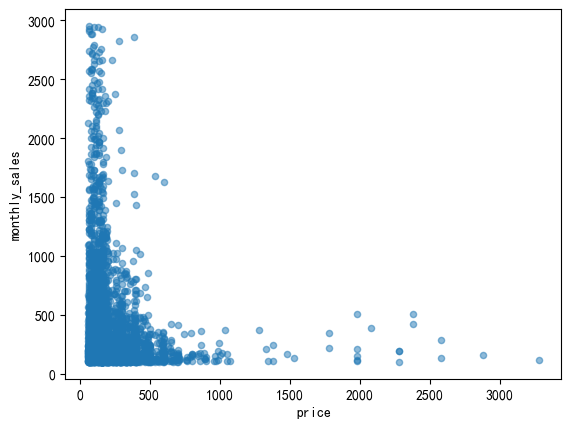

In [16]:
#商品价格对销量的影响
data.plot(kind='scatter',x = 'price',y = 'monthly_sales',alpha=0.5)

<AxesSubplot:xlabel='price', ylabel='monthly_sales_log'>

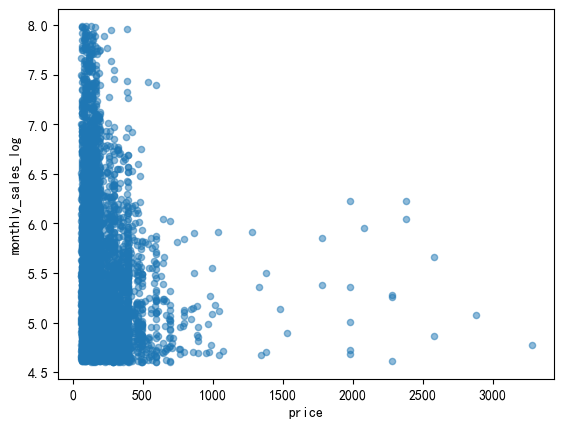

In [17]:
data.plot(kind='scatter',x = 'price',y = 'monthly_sales_log',alpha=0.5)

<AxesSubplot:xlabel='price_log', ylabel='monthly_sales_log'>

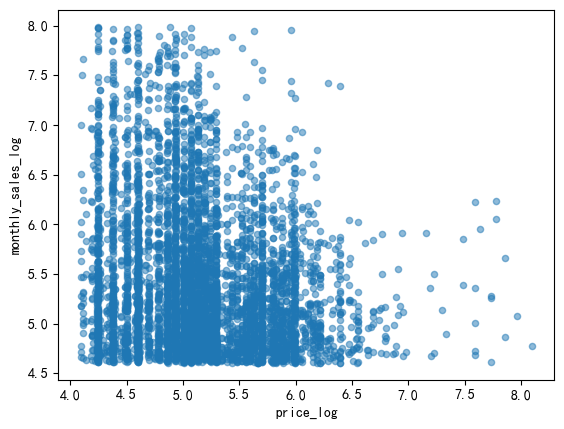

In [18]:
data['price_log'] = data['price'].apply(np.log1p)
data.plot(kind='scatter',x = 'price_log',y = 'monthly_sales_log',alpha=0.5)

<AxesSubplot:xlabel='商品价段'>

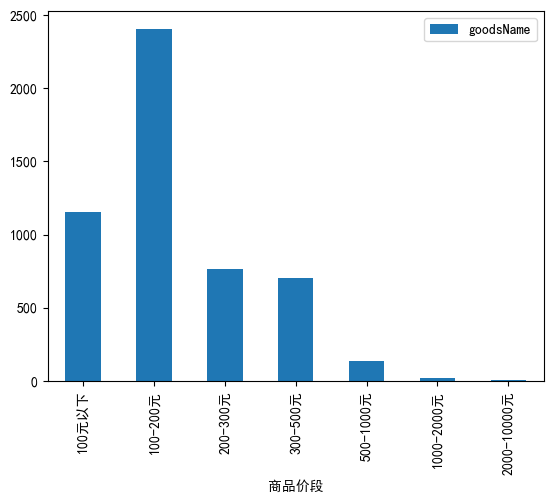

In [19]:
data['商品价段'] = pd.cut(data['price'],bins=[0,100,200,300,500,1000,2000,10000],labels = [ '100元以下', '100-200元', '200-300元',
                                                                                '300-500元', '500-1000元','1000-2000元','2000-10000元'])
data[['goodsName','商品价段']].groupby(by='商品价段').count().plot.bar()

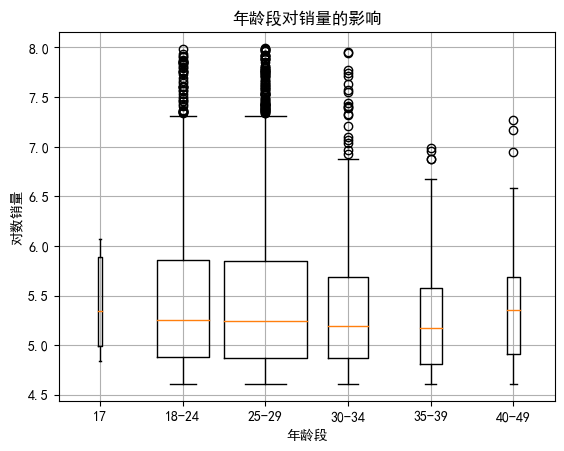

In [20]:
lei_boxplot(data[['monthly_sales_log','age']], 'age',1,'年龄段对销量的影响','年龄段','对数销量')

C:\Users\lb\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


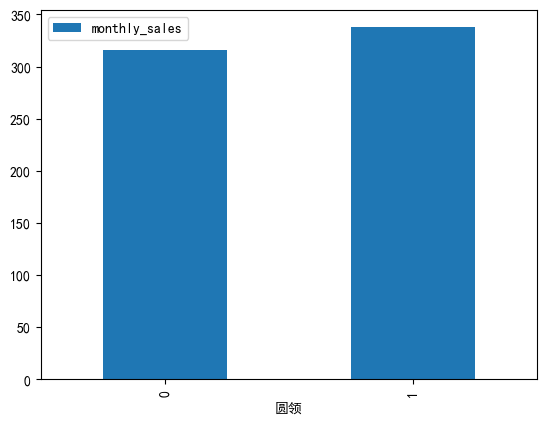

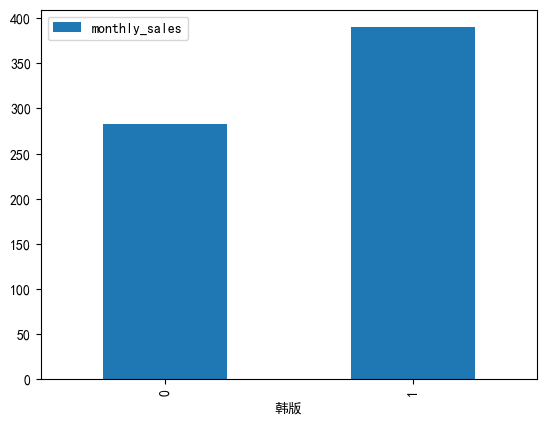

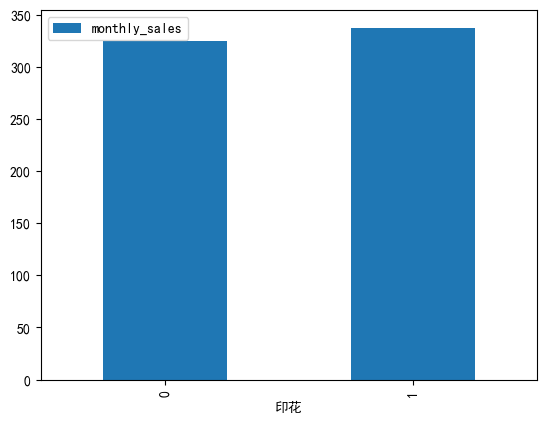

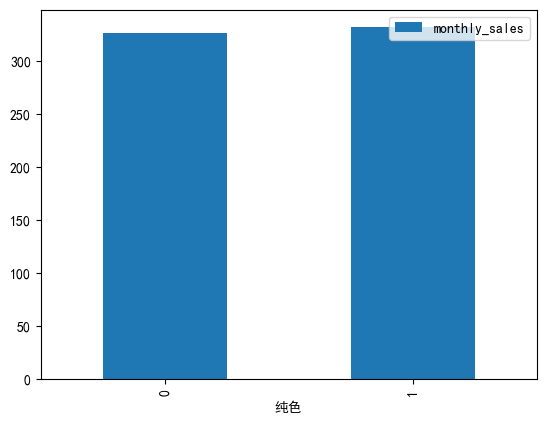

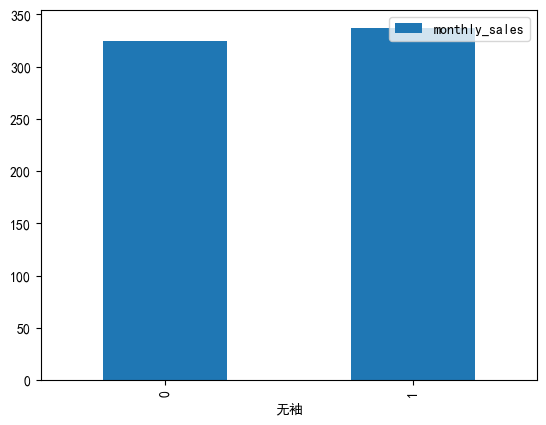

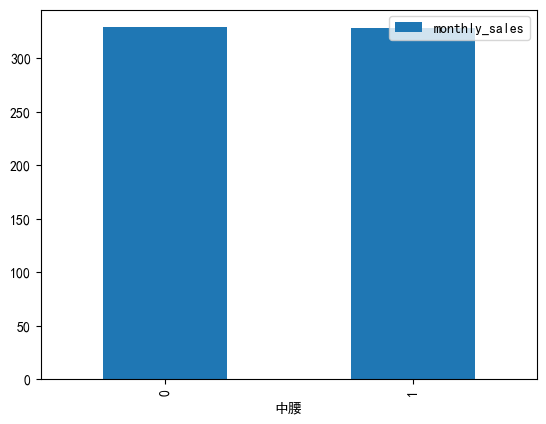

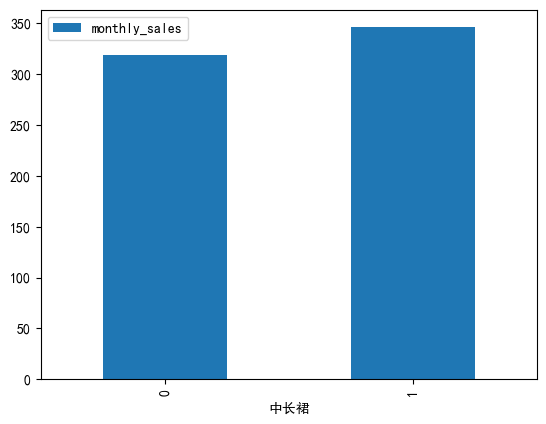

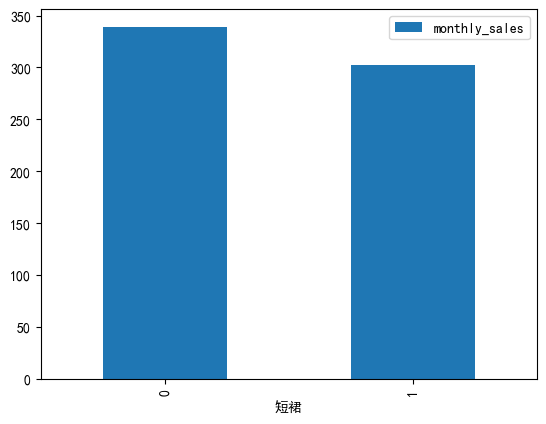

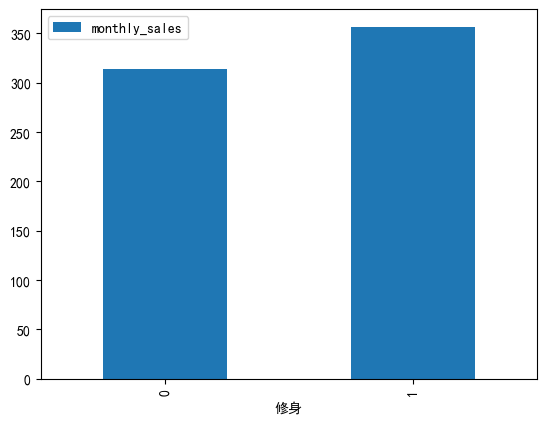

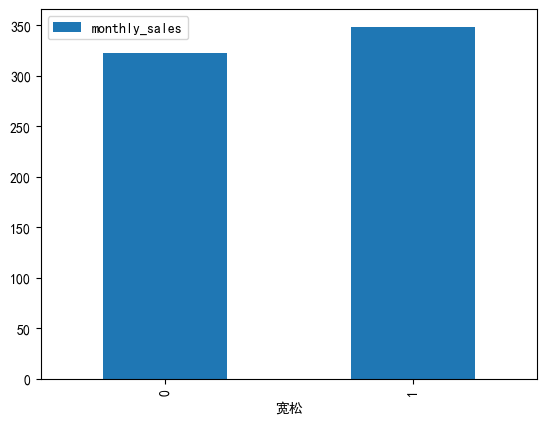

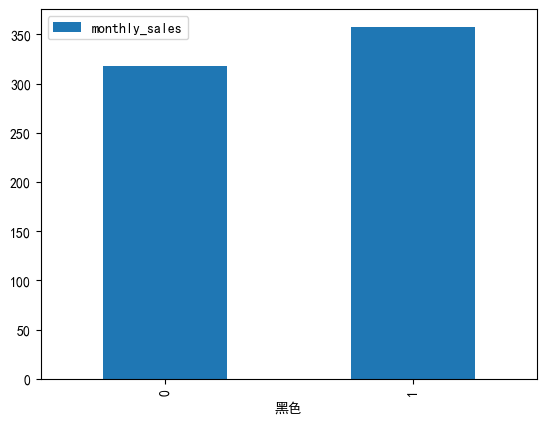

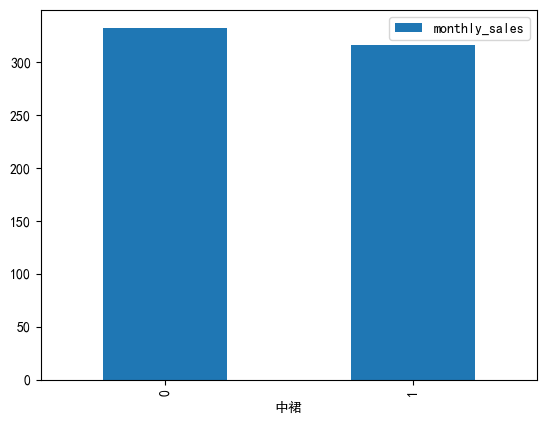

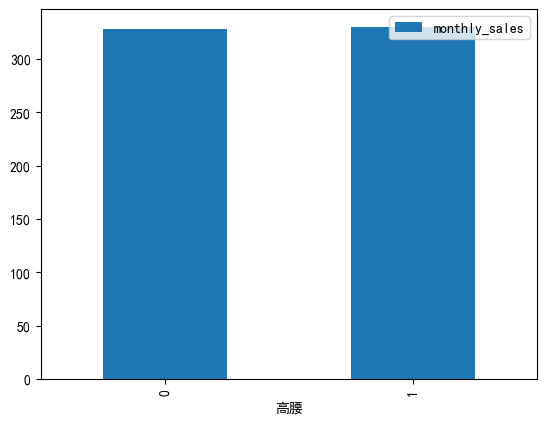

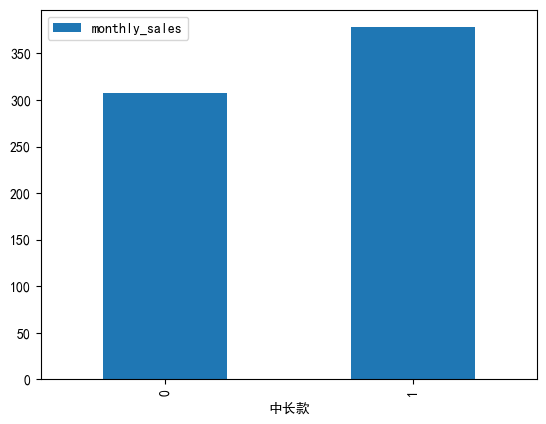

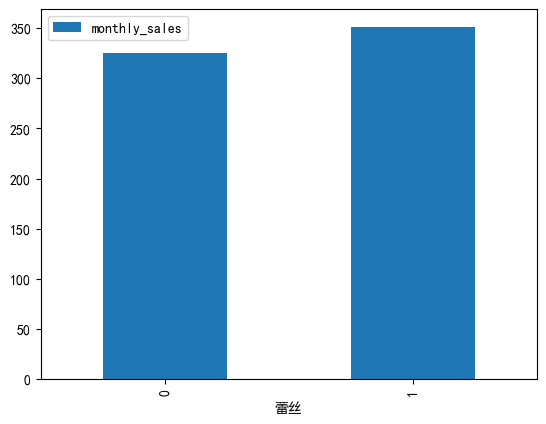

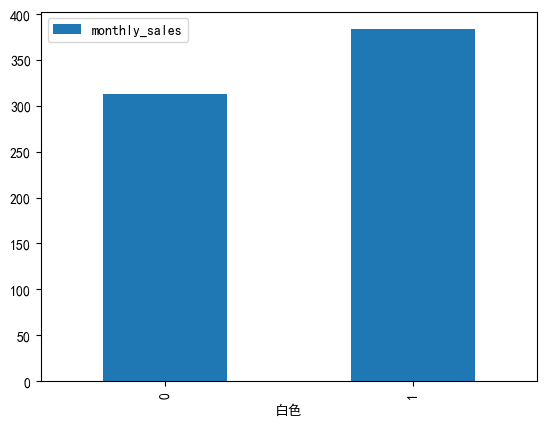

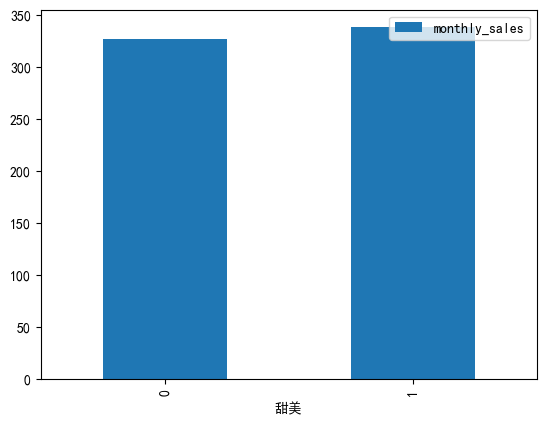

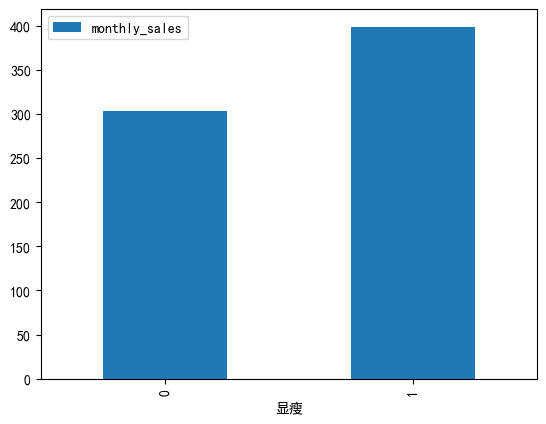

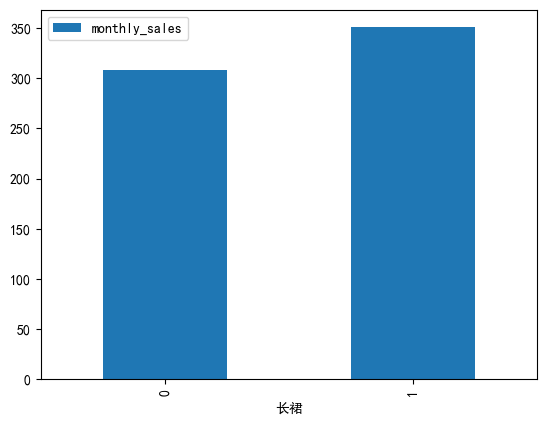

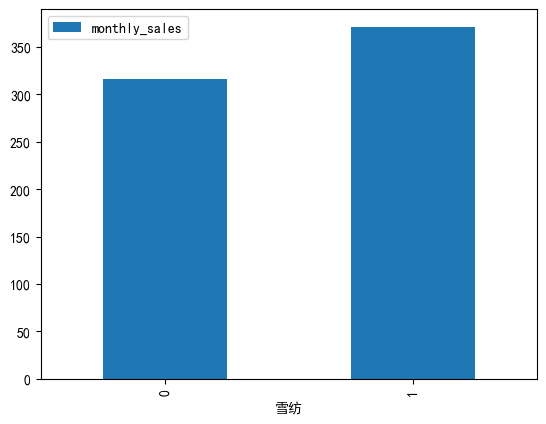

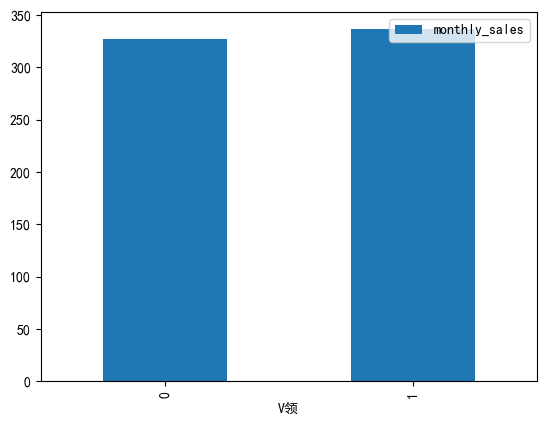

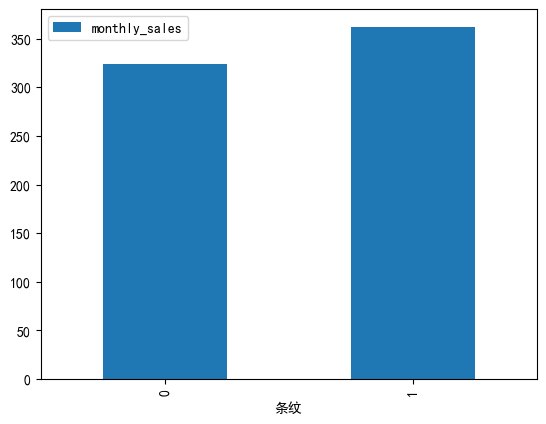

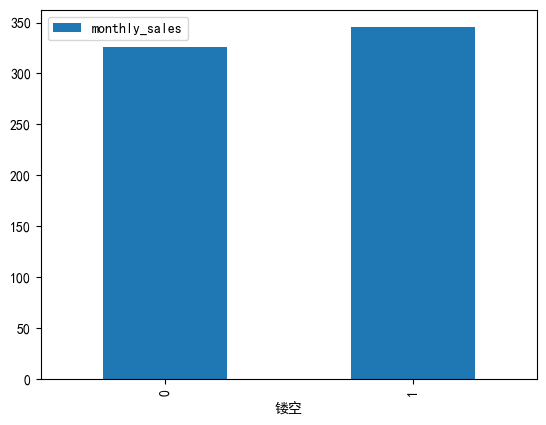

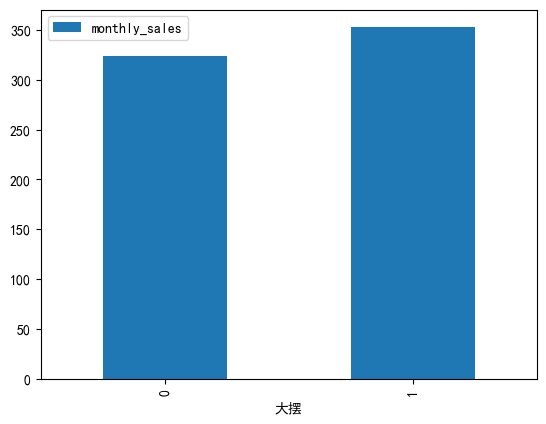

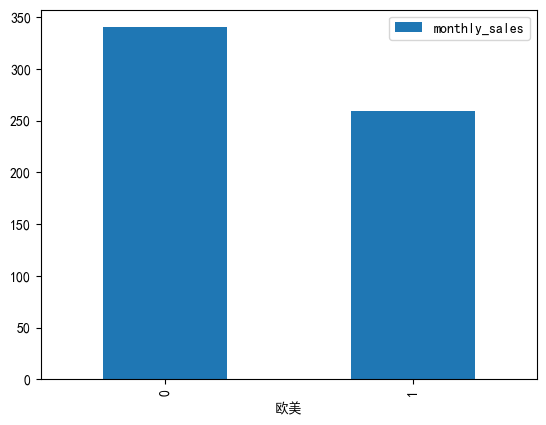

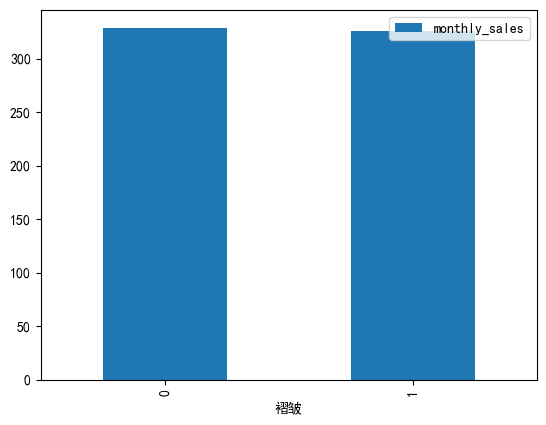

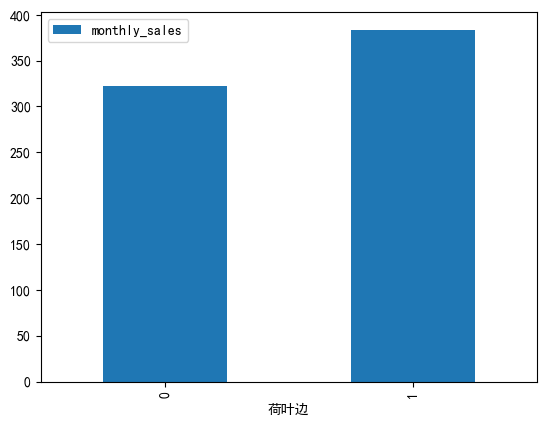

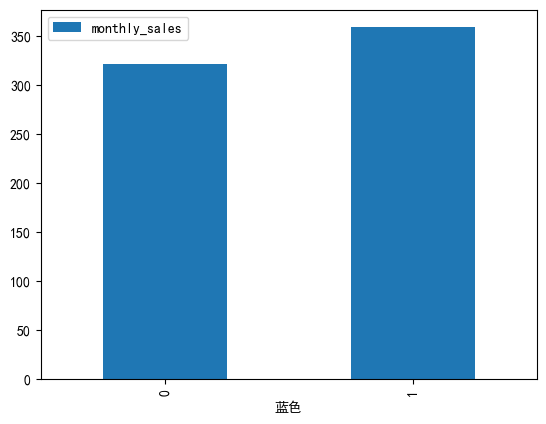

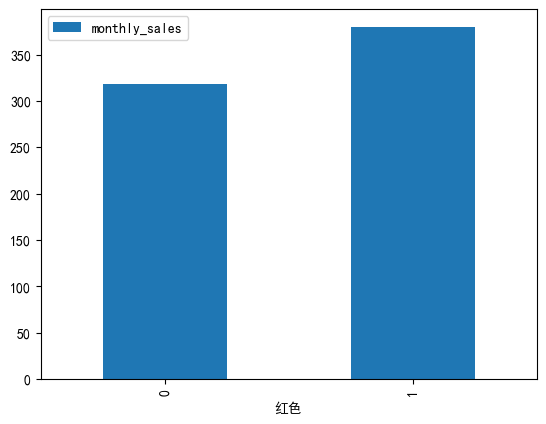

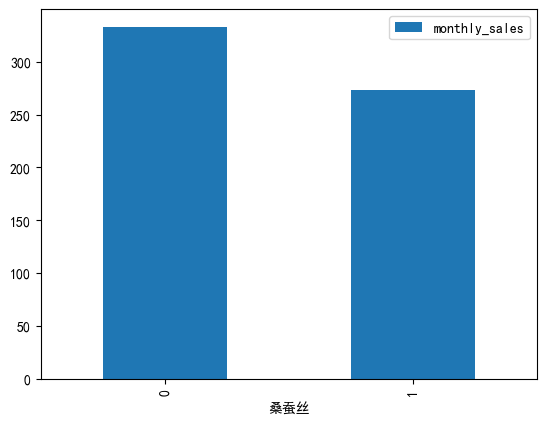

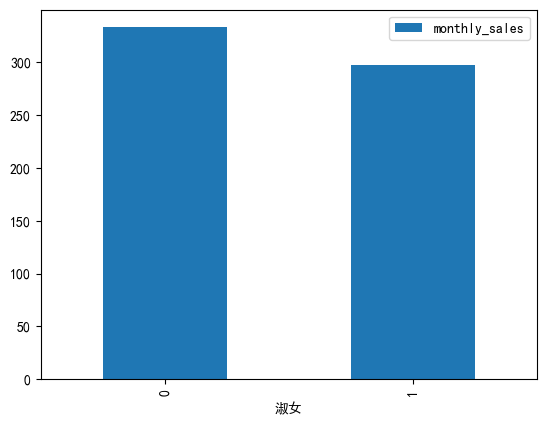

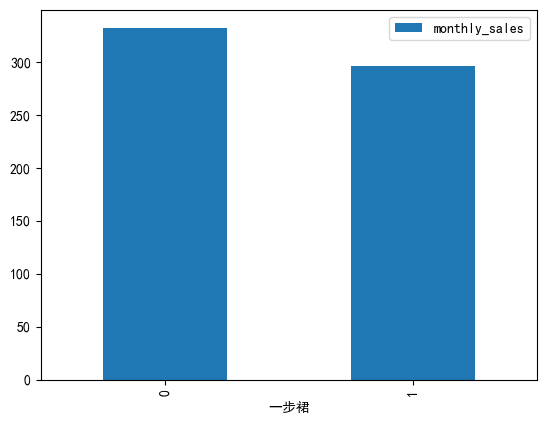

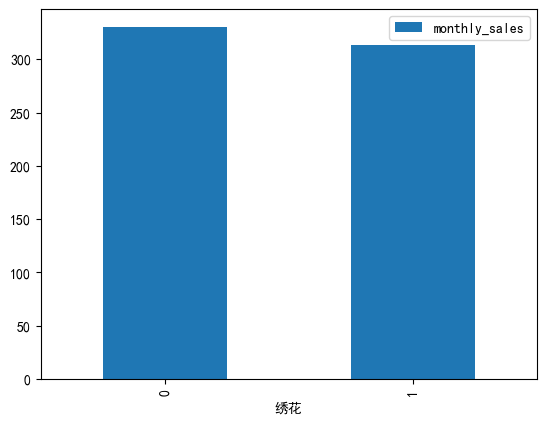

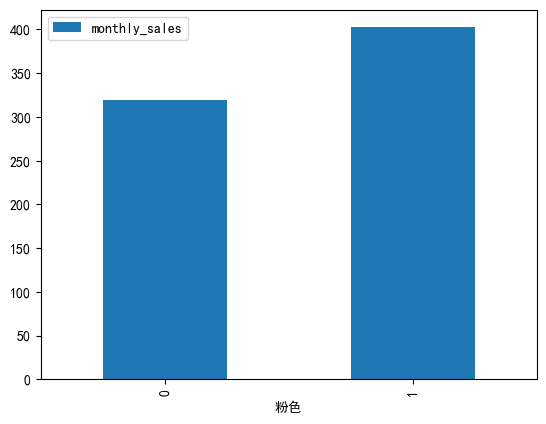

In [21]:
#风格对销量的影响
styleList = ['圆领','韩版','印花','纯色','无袖','中腰','中长裙','短裙','修身','宽松','黑色','中裙','高腰','中长款','蕾丝','白色',
             '甜美','显瘦','长裙','雪纺','V领','条纹','镂空','大摆','欧美','褶皱','荷叶边','蓝色','红色','桑蚕丝','淑女','一步裙',
             '绣花','粉色']
for i in range(len(styleList)):
    styleSale = pd.DataFrame(data[['monthly_sales',styleList[i]]].groupby(styleList[i]).mean())
    styleSale.plot.bar()

In [22]:
#筛选得到：'圆领'，韩版','中长裙','黑色','中长款','白色','显瘦','长裙','雪纺','条纹','荷叶边','蓝色','红色','粉色'
#将'中长裙'、'中长款'和'长裙'合并为'中长款'

In [23]:
data['中长款'] = data['中长款'] + data['中长裙'] + data['长裙']
data['中长款'][data.中长款>1] = 1

C:\Users\lb\AppData\Local\Temp\ipykernel_12936\1095886140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['中长款'][data.中长款>1] = 1


In [24]:
data[['monthly_sales_log','price_log','age','圆领','韩版','黑色','中长款','白色','显瘦','雪纺','条纹','荷叶边','蓝色','红色','粉色']]

,monthly_sales_log,price_log,age,圆领,韩版,黑色,中长款,白色,显瘦,雪纺,条纹,荷叶边,蓝色,红色,粉色
0,7.990577,4.248495,25-29,1,1,1,1,0,1,1,0,1,1,1,1
1,7.987864,4.605170,25-29,1,1,0,1,1,0,1,0,0,1,1,1
2,7.987524,4.882802,25-29,0,0,0,0,0,1,0,1,0,0,0,0
3,7.981392,4.248495,18-24,0,1,0,1,0,0,1,0,1,0,0,0
4,7.981050,5.068904,25-29,1,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,4.605170,5.666427,25-29,0,0,0,1,0,1,0,1,0,0,0,0
5189,4.605170,5.068904,25-29,0,0,0,1,0,1,0,0,0,1,0,1
5190,4.605170,5.669881,25-29,0,0,0,1,1,0,0,0,1,0,0,0
5191,4.605170,5.666427,30-34,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data['age17'] = 0
data['age18_24'] = 0
data['age25_29'] = 0
data['age30_34'] = 0
data['age35_39'] = 0
data['age40'] = 0

In [26]:
data

,goodsName,shopName,shopAge,shopPlace,shopMiaoshu,shopWuliu,shopFuwu,age,price,monthly_sales,...,碎花,monthly_sales_log,price_log,商品价段,age17,age18_24,age25_29,age30_34,age35_39,age40
0,歌兔雪纺连衣裙夏季长裙修身显瘦小清新 中长款女装露肩高腰裙子,歌兔服饰旗舰店,3,杭州,4.8,4.7,4.7,25-29,69.0,2952,...,1,7.990577,4.248495,100元以下,0,0,0,0,0,0
1,卡洛莱韩版气质修身露肩收腰a字裙夏季新款女装时尚雪纺连衣裙女,卡洛莱旗舰店,4,杭州,4.8,4.7,4.7,25-29,99.0,2944,...,0,7.987864,4.605170,100元以下,0,0,0,0,0,0
2,Krazy清新减龄显瘦32支纯棉撞色polo领海魂条纹学院风弹力连衣裙,krazy服饰旗舰店,6,广州,4.8,4.8,4.8,25-29,131.0,2943,...,0,7.987524,4.882802,100-200元,0,0,0,0,0,0
3,连衣裙女夏2016新款潮大码露肩小清新吊带裙印花V领雪纺沙滩裙子,多曼妮旗舰店,0,广州,4.8,4.7,4.7,18-24,69.0,2925,...,0,7.981392,4.248495,100元以下,0,0,0,0,0,0
4,韩版显瘦鱼尾裙子2016夏季高腰包臀挂脖露肩荷叶边无袖连衣裙修身,米莱伊旗舰店,3,杭州,4.8,4.8,4.8,25-29,158.0,2924,...,0,7.981050,5.068904,100-200元,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,betu百图中长款V领条纹无袖连衣裙女修身显瘦背带裙2016秋1607T36,betu旗舰店,7,深圳,4.8,4.8,4.8,25-29,288.0,99,...,0,4.605170,5.666427,200-300元,0,0,0,0,0,0
5189,念曼2016夏装新款韩国百搭文艺范气质收腰显瘦中长款棉麻连衣裙女,念曼旗舰店,0,杭州,4.8,4.8,4.8,25-29,158.0,99,...,0,4.605170,5.068904,100-200元,0,0,0,0,0,0
5190,2016夏季小清新V领修身收腰纯色中长款白色网格镂空a字大摆连衣裙,灵子飞飞旗舰店,3,深圳,4.8,4.8,4.8,25-29,289.0,99,...,0,4.605170,5.669881,200-300元,0,0,0,0,0,0
5191,欧美高端大牌2016直筒印花修身妇女品牌中年女装夏装大码连衣裙夏,eychii旗舰店,3,深圳,4.9,4.9,4.9,30-34,288.0,99,...,0,4.605170,5.666427,200-300元,0,0,0,0,0,0


In [27]:
data['age17'][data['age']=='17'] = 1
data['age18_24'][data['age']=='18-24'] = 1
data['age25_29'][data['age']=='25-29'] = 1
data['age30_34'][data['age']=='30-34'] = 1
data['age35_39'][data['age']=='35-39'] = 1
data['age40'][data['age']=='40-49'] = 1

C:\Users\lb\AppData\Local\Temp\ipykernel_12936\324073977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age17'][data['age']=='17'] = 1
C:\Users\lb\AppData\Local\Temp\ipykernel_12936\324073977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age18_24'][data['age']=='18-24'] = 1
C:\Users\lb\AppData\Local\Temp\ipykernel_12936\324073977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age25_29'][data['age']=='2

In [28]:
data1 = data[['monthly_sales_log','price_log','age17','age18_24','age25_29','age30_34','age35_39','age40','圆领','韩版','黑色','中长款','白色','显瘦','雪纺','条纹','荷叶边','蓝色','红色','粉色']]

In [29]:
data1.to_csv('./data/4.1/data2.csv',header=True,index=False)